In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r"/content/data.csv",sep=';')

In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

**EDA**

In [ ]:
df = df.rename(columns={'Nacionality': 'Nationality'})

In [ ]:
#Mappings
marital_status_mapping = {1 : 'single', 2 : 'married', 3 : 'widower', 4 : 'divorced', 5 : 'facto union', 6 : 'legally separated'}

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'}



course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

Daytime_evening_attendance_t_mapping = {1 : 'daytime',  0 : 'evening'}

Previous_qualification_mapping = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

nationality_mapping = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"}

mothers_qualification_mapping = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"}

Fathers_qualification_mapping = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd Year Complementary High School Course",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-Professional Course",
    25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"}

mothers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

fathers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'personal service workers',
    152: 'sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

educational_special_needs_mapping = {1 :'yes', 0:'no'}

debtor_mapping = {1 :'yes', 0:'no'}

Tuition_fees_up_to_date_mapping = {1 :'yes', 0:'no'}

Gender_mapping = {1 : 'male', 0 : 'female'}

Scholarship_holder_mapping = {1 :'yes', 0:'no'}

International_mapping = {1 :'yes', 0:'no'}

Application_order_mapping = {
    0: 'first choice',
    1: 'second choice',
    2: 'third choice',
    3: 'fourth choice',
    4: 'fifth choice',
    5: 'sixth choice',
    6: 'seventh choice',
    7: 'eighth choice',
    8: 'ninth choice',
    9: 'last choice'}



In [ ]:
#Data conversion
df['Marital status'] = df['Marital status'].map(marital_status_mapping)
df['Application mode'] = df['Application mode'].map(application_mode_mapping)
df['Application order'] = df['Application order'].map(Application_order_mapping)
df['Course'] = df['Course'].map(course_mapping)
df['Daytime/evening attendance\t'] = df['Daytime/evening attendance\t'].map(Daytime_evening_attendance_t_mapping)
df['Previous qualification'] = df['Previous qualification'].map(Previous_qualification_mapping)
df['Nationality'] = df['Nationality'].map(nationality_mapping)
df["Mother's qualification"] = df["Mother's qualification"].map(mothers_qualification_mapping)
df["Father's qualification"] = df["Father's qualification"].map(Fathers_qualification_mapping)
df["Mother's occupation"] = df["Mother's occupation"].map(mothers_occupation_mapping)
df["Father's occupation"] = df["Father's occupation"].map(fathers_occupation_mapping)
df['Educational special needs'] = df['Educational special needs'].map(educational_special_needs_mapping)
df['Debtor'] = df['Debtor'].map(debtor_mapping)
df['Tuition fees up to date'] = df['Tuition fees up to date'].map(Tuition_fees_up_to_date_mapping)
df['Gender'] = df['Gender'].map(Gender_mapping)
df['Scholarship holder'] = df['Scholarship holder'].map(Scholarship_holder_mapping)
df['International'] = df['International'].map(International_mapping)

In [ ]:
df['Nationality'].value_counts()/len(df)  # var - allmost all the students are from portuguese only so dropping the col

Portuguese               0.975136
Brazilian                0.008590
Santomean                0.003165
Cape Verdean             0.002939
Spanish                  0.002939
Guinean                  0.001130
Moldova (Republic of)    0.000678
Italian                  0.000678
Ukrainian                0.000678
Angolan                  0.000452
Mexican                  0.000452
Romanian                 0.000452
Mozambican               0.000452
German                   0.000452
Russian                  0.000452
Turkish                  0.000226
Dutch                    0.000226
Colombian                0.000226
Cuban                    0.000226
English                  0.000226
Lithuanian               0.000226
Name: Nationality, dtype: float64

In [ ]:
df.drop('Nationality',axis=1,inplace=True)

In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,sixth choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),second choice,Tourism,daytime,Secondary education,160.0,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,sixth choice,Communication Design,daytime,Secondary education,122.0,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,third choice,Journalism and Communication,daytime,Secondary education,122.0,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,"Personal Services, Security and Safety Workers...",...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,second choice,Social Service (evening attendance),evening,Secondary education,100.0,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,seventh choice,Journalism and Communication,daytime,Secondary education,125.0,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,third choice,Journalism and Communication,daytime,Secondary education,120.0,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,second choice,Nursing,daytime,Secondary education,154.0,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,second choice,Management,daytime,Secondary education,180.0,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,"Skilled Workers in Industry, Construction and ...",...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Marital status                                     object
Application mode                                   object
Application order                                  object
Course                                             object
Daytime/evening attendance\t                       object
Previous qualification                             object
Previous qualification (grade)                    float64
Nacionality                                        object
Mother's qualification                             object
Father's qualification                             object
Mother's occupation                                object
Father's occupation                                object
Admission grade                                   float64
Displaced                                           int64
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender        

**Univariate Analysis**

Previous qualification (grade)                       Axes(0.125,0.814746;0.352273x0.0652542)
Admission grade                                   Axes(0.547727,0.814746;0.352273x0.0652542)
Displaced                                            Axes(0.125,0.736441;0.352273x0.0652542)
Age at enrollment                                 Axes(0.547727,0.736441;0.352273x0.0652542)
Curricular units 1st sem (credited)                  Axes(0.125,0.658136;0.352273x0.0652542)
Curricular units 1st sem (enrolled)               Axes(0.547727,0.658136;0.352273x0.0652542)
Curricular units 1st sem (evaluations)               Axes(0.125,0.579831;0.352273x0.0652542)
Curricular units 1st sem (approved)               Axes(0.547727,0.579831;0.352273x0.0652542)
Curricular units 1st sem (grade)                     Axes(0.125,0.501525;0.352273x0.0652542)
Curricular units 1st sem (without evaluations)    Axes(0.547727,0.501525;0.352273x0.0652542)
Curricular units 2nd sem (credited)                   Axes(0.125,0.423

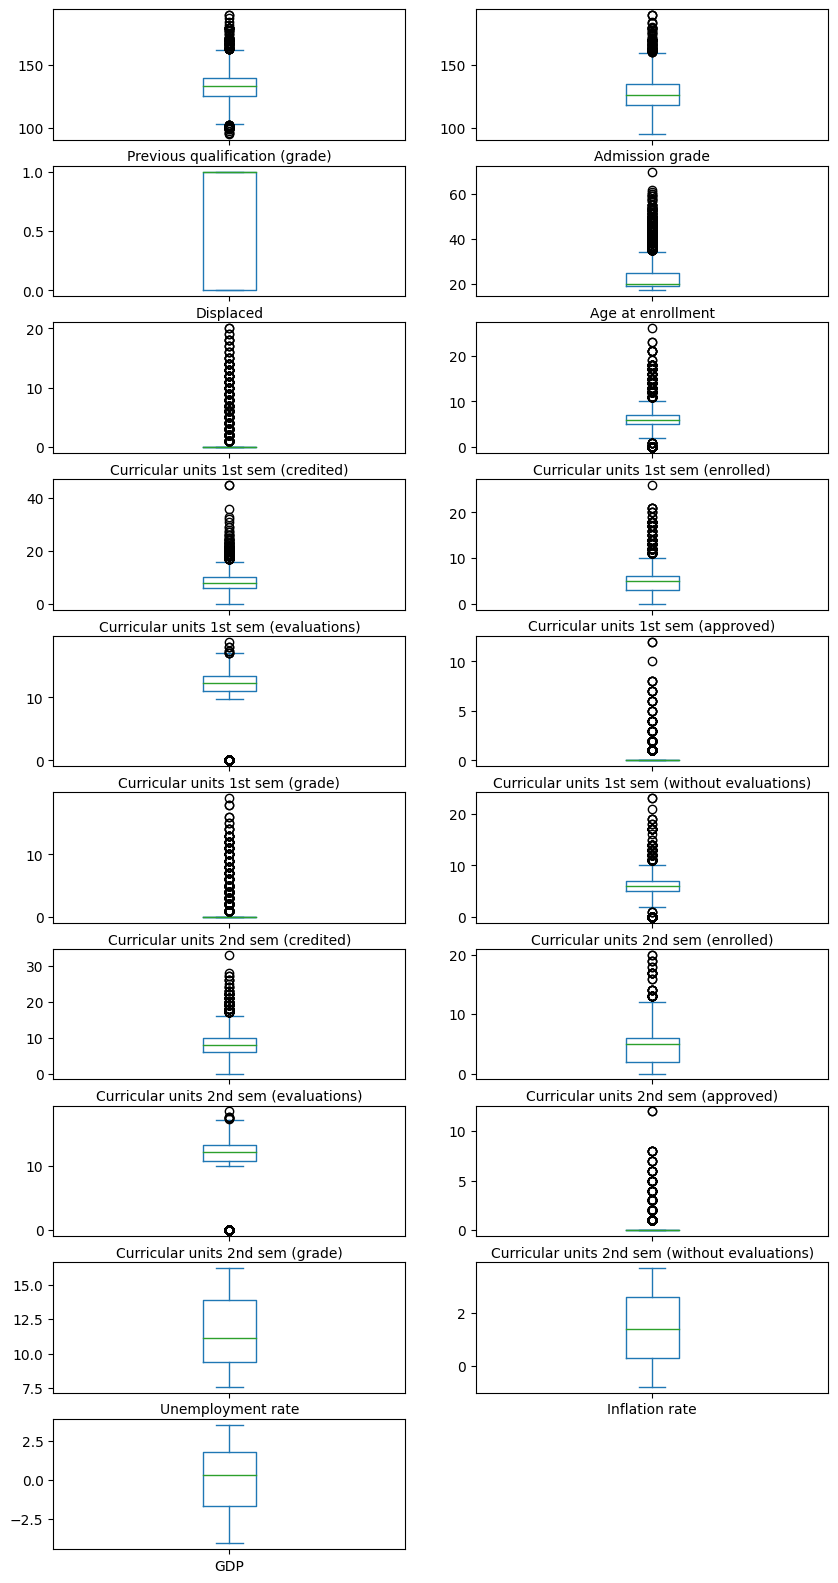

In [ ]:
df.plot(kind='box', subplots=True, layout=(10, 2), figsize=(10, 20))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

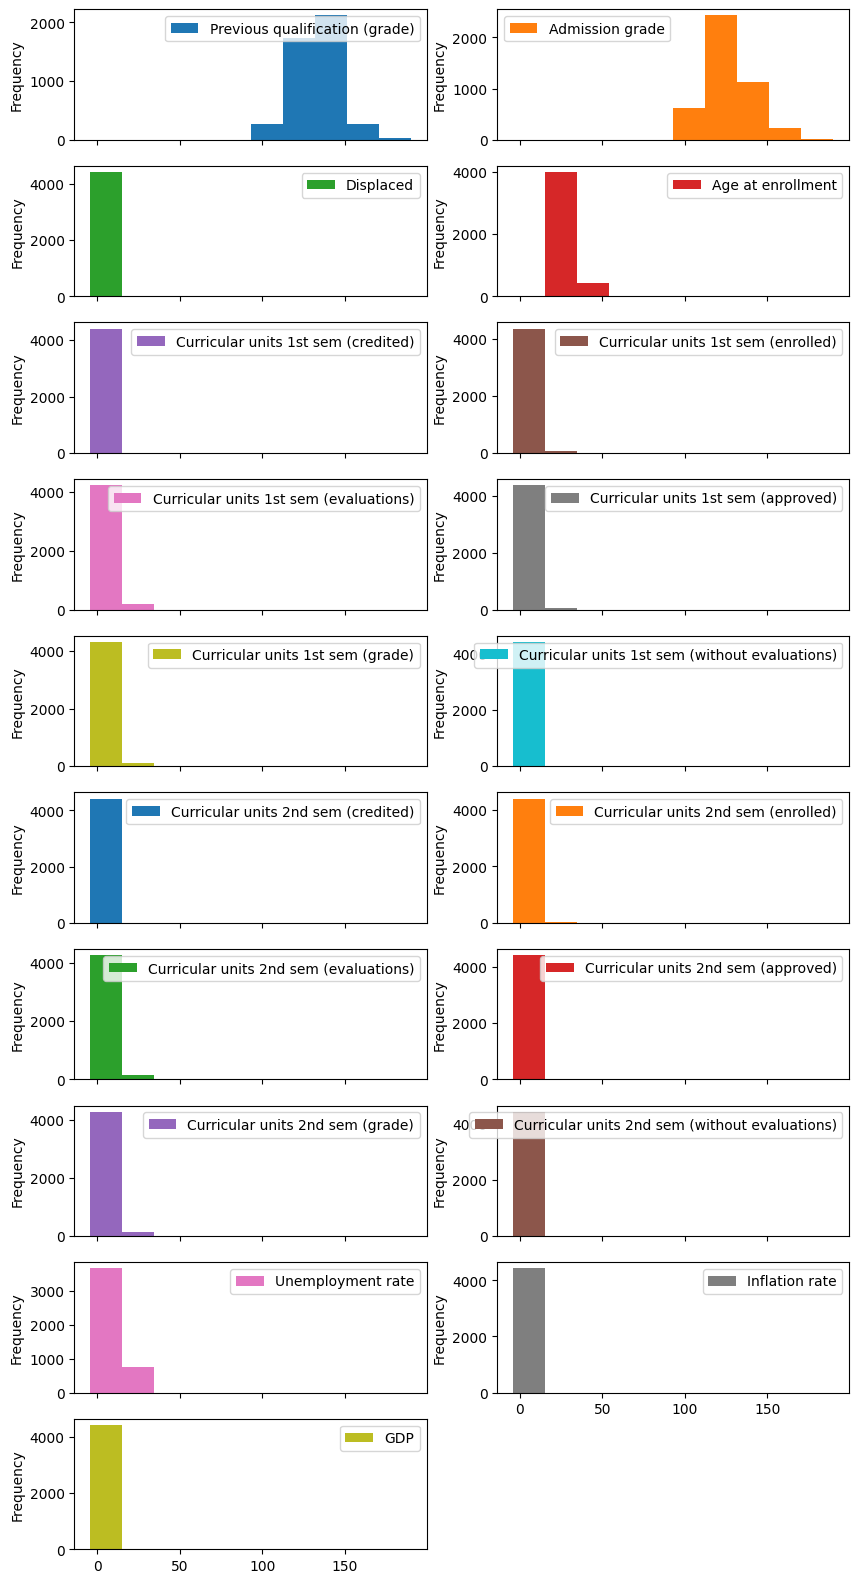

In [ ]:
df.plot(kind='hist', subplots=True, layout=(10, 2), figsize=(10, 20))

Text(0.5, 1.0, 'Distribution of Target Variable')

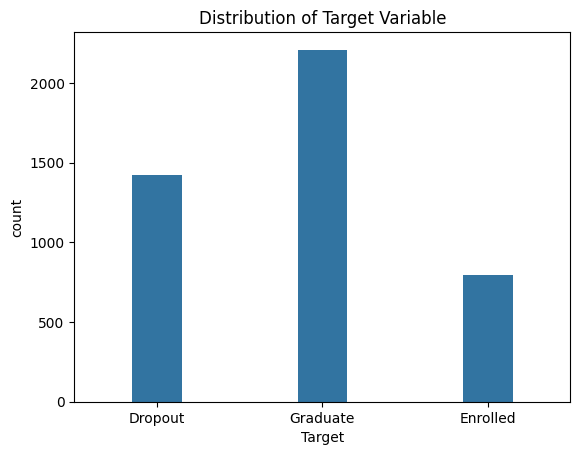

In [ ]:
sns.countplot(data=df,x='Target',width=0.3)
plt.title('Distribution of Target Variable')

From the above plot we can find the distribution/count of data there are more graduates in the applicants

<Axes: >

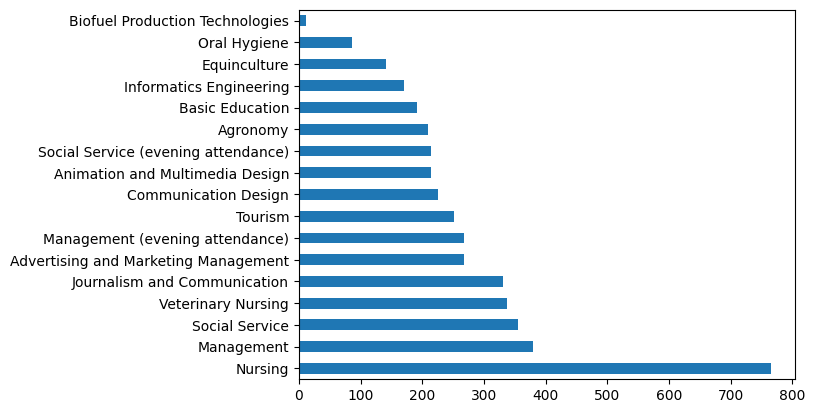

In [ ]:
df['Course'].value_counts().plot(kind='barh')

From the above plot, we can conclude that more students are registered for nursing course

**Bivariate Analysis**

In [ ]:
pd.crosstab(df['Marital status'], df['Target'])

Target,Dropout,Enrolled,Graduate
Marital status,,,
divorced,42,16,33
facto union,11,3,11
legally separated,4,1,1
married,179,52,148
single,1184,720,2015
widower,1,2,1


Gender vs Previous Qualification

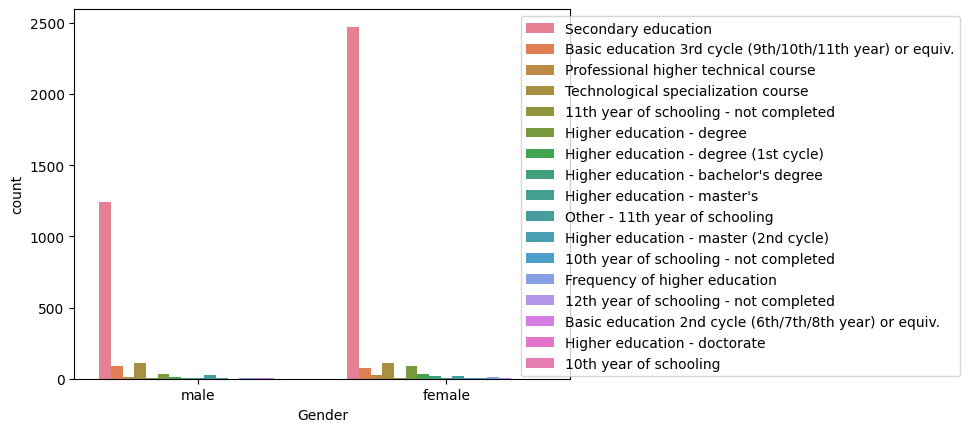

In [ ]:
sns.countplot(data=df, x='Gender', hue='Previous qualification')
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

From the above plot, we can conclude that most applicants are from secondary education in both male and female

<Axes: ylabel='Gender'>

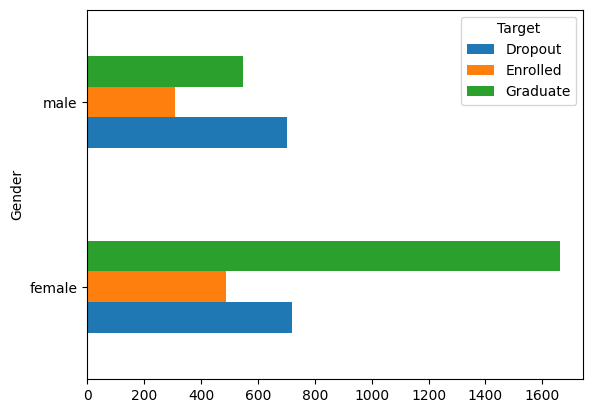

In [ ]:
pd.crosstab(df['Gender'], df['Target']).plot(kind='barh')

There are more graduates in female as compared to male and dropouts ratio is approximately equal in both female and male

Marital Status vs. Age at Enrollment

<Axes: ylabel='Marital status'>

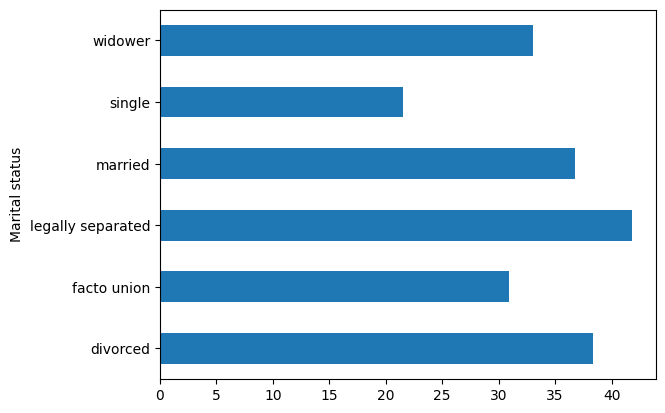

In [ ]:
df.groupby(by='Marital status')['Age at enrollment'].mean().plot(kind='barh')

From the above plot, we can conclude that at what age, with different marital status people are enrolling in courses

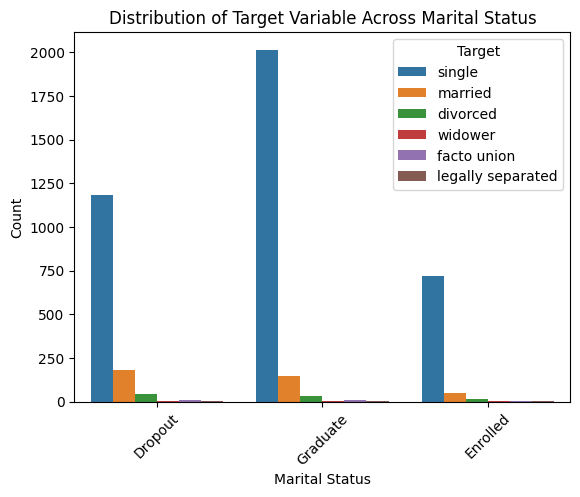

In [ ]:
sns.countplot(data=df, hue='Marital status', x='Target')
plt.title('Distribution of Target Variable Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()


we can observe here, in all the classes in the target variable most are from single

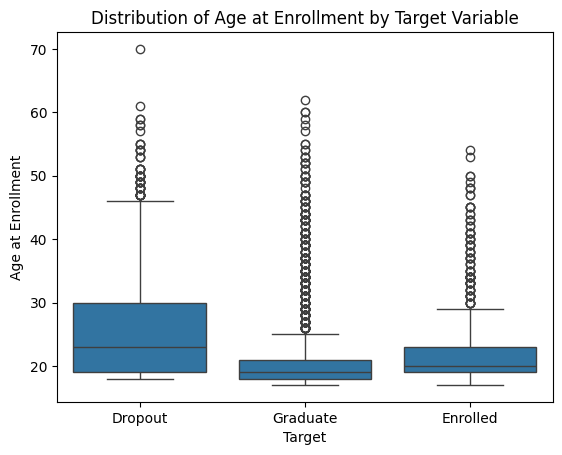

In [ ]:
sns.boxplot(data=df, x='Target', y='Age at enrollment')
plt.title('Distribution of Age at Enrollment by Target Variable')
plt.xlabel('Target')
plt.ylabel('Age at Enrollment')
plt.show()


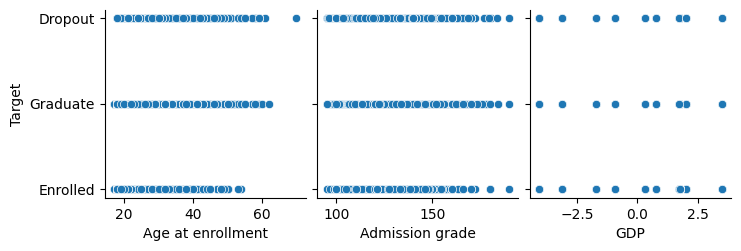

In [ ]:
sns.pairplot(df, x_vars=['Age at enrollment', 'Admission grade', 'GDP'], y_vars='Target', kind='scatter')
plt.show()


Multi-variate

In [ ]:
df.corr(numeric_only=True)

,Previous qualification (grade),Admission grade,Displaced,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Previous qualification (grade),1.000000,0.580444,-0.011001,-0.111377,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Admission grade,0.580444,1.000000,-0.000543,-0.029915,0.040829,-0.033251,-0.072059,0.070892,0.073868,0.009033,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519
Displaced,-0.011001,-0.000543,1.000000,-0.362032,-0.097268,-0.063812,-0.077665,0.047682,0.064815,-0.021671,-0.091738,-0.041823,-0.038839,0.063698,0.069087,-0.035959,-0.130327,-0.012385,0.062875
Age at enrollment,-0.111377,-0.029915,-0.362032,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,0.057470,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025018,0.025377,-0.064678
Curricular units 1st sem (credited),-0.008872,0.040829,-0.097268,0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.009778,0.023348,-0.026513
Curricular units 1st sem (enrolled),-0.029169,-0.033251,-0.063812,0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.038404,0.036758,-0.026262
Curricular units 1st sem (evaluations),-0.070702,-0.072059,-0.077665,0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,0.061545,-0.006604,-0.099761
Curricular units 1st sem (approved),0.048410,0.070892,0.047682,-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,0.051286,-0.007114,0.018459
Curricular units 1st sem (grade),0.059438,0.073868,0.064815,-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,0.014821,-0.033904,0.054801
Curricular units 1st sem (without evaluations),-0.003926,0.009033,-0.021671,0.057470,0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261,-0.045144,-0.052534,-0.144673


<Axes: >

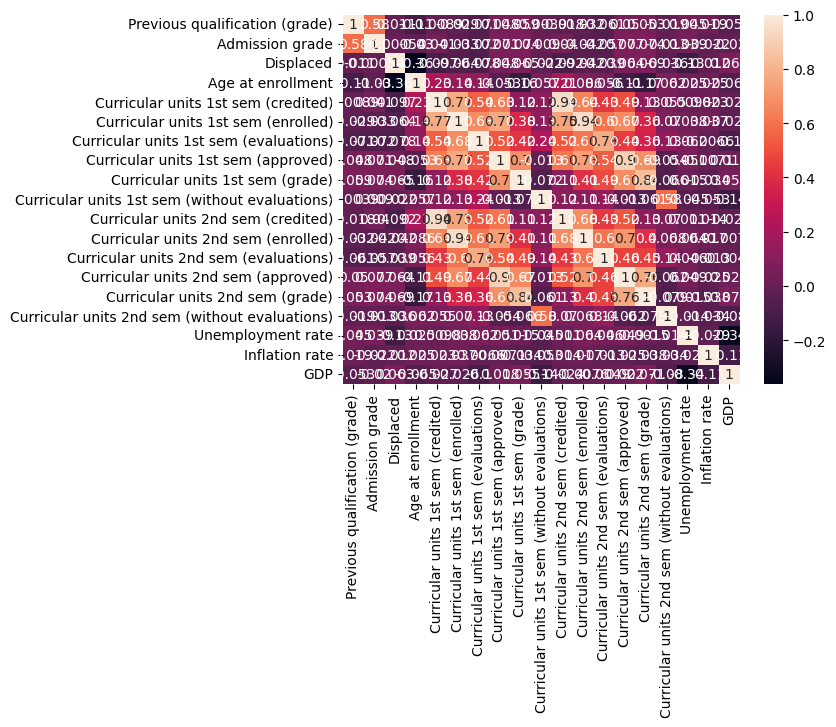

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Split the data**

In [ ]:
df = pd.read_csv(r"/content/data.csv",sep=';')

**Data Preprocessing**

In [ ]:
df = df.rename(columns={'Nacionality': 'Nationality'})

In [ ]:
df['Nationality'].var()

47.810504303290486

In [ ]:
df.drop('Nationality',axis=1,inplace=True)

In [ ]:
X = df.drop('Target',axis=1)
y = df['Target']

In [ ]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,5,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,1,1,9,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,37,37,9,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,37,37,7,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
y

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=43)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train),columns = std.get_feature_names_out())

In [ ]:
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.376942,1.401283,-0.548419,0.072359,0.344782,-0.347278,1.234443,-1.191068,-1.384868,-0.265132,...,-0.197317,-0.277699,-0.099899,-0.012501,-1.481727,-1.974253,-0.198522,1.463862,1.153596,-1.793420
1,-0.291893,1.972488,-0.548419,0.072359,0.344782,3.691976,-0.204503,1.185460,1.027900,-0.074923,...,-0.197317,2.364173,1.722486,1.004512,1.187739,0.261541,-0.198522,-0.999717,0.132897,1.539784
2,-0.291893,-0.997776,-0.548419,-4.207240,0.344782,-0.347278,0.030272,-1.191068,0.962690,-0.074923,...,-0.197317,-0.277699,-2.833476,-2.046526,-1.481727,-1.974253,-0.198522,1.463862,1.153596,-1.793420
3,-0.291893,-0.997776,0.213298,0.104824,0.344782,-0.347278,-0.507439,-0.034919,1.027900,-0.074923,...,-0.197317,-0.277699,-0.099899,-0.012501,0.520372,0.405785,-0.198522,-0.290505,0.132897,0.760422
4,-0.291893,-0.997776,2.498447,0.313183,0.344782,-0.347278,-1.643450,-1.062607,-1.189239,-0.265132,...,-0.197317,-0.277699,0.355697,0.496006,0.186689,0.391361,-0.198522,0.306727,-0.523266,0.782438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.291893,1.172801,-0.548419,0.133898,0.344782,-0.150241,1.310177,-1.062607,-1.384868,3.006470,...,-0.197317,-0.277699,-0.555495,-0.775260,-1.481727,-1.974253,-0.198522,0.418707,1.809760,-0.754271
3535,-0.291893,-0.083849,1.736730,0.142135,0.344782,-0.347278,-0.961844,1.185460,-0.211089,-0.074923,...,-0.197317,-0.277699,-0.555495,-0.775260,0.186689,0.564455,-0.198522,-0.999717,0.132897,1.539784
3536,1.376942,1.172801,-0.548419,0.128567,0.344782,-0.347278,-1.719184,1.121229,0.962690,-0.074923,...,-0.197317,-0.277699,-0.555495,0.241752,-1.481727,-1.974253,-0.198522,-0.999717,0.132897,1.539784
3537,-0.291893,-0.026728,2.498447,0.128567,0.344782,-0.347278,0.249901,-1.062607,-1.319659,-0.341216,...,-0.197317,-0.277699,-0.555495,0.241752,0.186689,0.855692,-0.198522,0.306727,-0.523266,0.782438


**X_test**

In [ ]:
X_test = pd.DataFrame(std.transform(X_test),columns = std.get_feature_names_out())

In [ ]:
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.291893,1.172801,-0.548419,-0.406867,-2.900385,-0.347278,-0.961844,1.185460,0.962690,-0.074923,...,-0.197317,0.250675,-0.099899,-0.266754,0.186689,0.333663,-0.198522,0.866631,-1.106523,0.342120
1,-0.291893,-0.083849,-0.548419,0.445467,0.344782,-0.347278,0.249901,-0.034919,1.027900,-0.074923,...,-0.197317,-0.277699,-0.099899,-0.521007,0.520372,0.558044,-0.198522,0.418707,1.809760,-0.754271
2,-0.291893,-0.997776,-0.548419,0.193982,0.344782,-0.347278,-0.583174,1.121229,0.962690,-0.303174,...,-0.197317,-0.277699,-0.099899,-0.521007,0.186689,0.372128,-0.198522,-0.178524,-0.450359,0.883711
3,-0.291893,1.172801,-0.548419,0.395558,0.344782,0.440869,0.030272,-0.869916,-0.015459,-0.303174,...,-0.197317,-0.277699,-0.555495,-0.775260,-1.481727,-1.974253,6.343104,-0.813082,-1.471058,-1.379522
4,-0.291893,-0.083849,-0.548419,-4.207240,0.344782,-0.347278,0.552837,-1.191068,-1.384868,-0.227090,...,-0.197317,-0.277699,-2.833476,-2.046526,-1.481727,-1.974253,-0.198522,0.418707,1.809760,-0.754271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1.376942,1.172801,-0.548419,0.551100,-2.900385,-0.347278,-0.961844,1.121229,0.962690,-0.074923,...,-0.197317,-0.277699,-0.555495,0.241752,-0.146994,0.285582,-0.198522,-0.813082,-1.471058,-1.379522
881,-0.291893,-0.083849,-0.548419,0.313183,0.344782,-0.347278,0.628571,-1.126838,1.027900,-0.341216,...,-0.197317,-0.277699,0.811293,1.767271,0.186689,0.564455,-0.198522,0.866631,-1.106523,0.342120
882,-0.291893,-0.997776,0.213298,0.104824,0.344782,-0.347278,-0.280237,-1.062607,-1.189239,-0.341216,...,-0.197317,-0.277699,-0.099899,-0.521007,0.520372,0.493935,-0.198522,-1.484967,1.007782,0.135171
883,-0.291893,-0.083849,-0.548419,0.395558,0.344782,-0.347278,1.234443,-0.034919,0.962690,-0.151007,...,-0.197317,-0.277699,-0.099899,0.241752,0.520372,0.675577,-0.198522,-0.290505,0.132897,0.760422


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,precision_score,recall_score

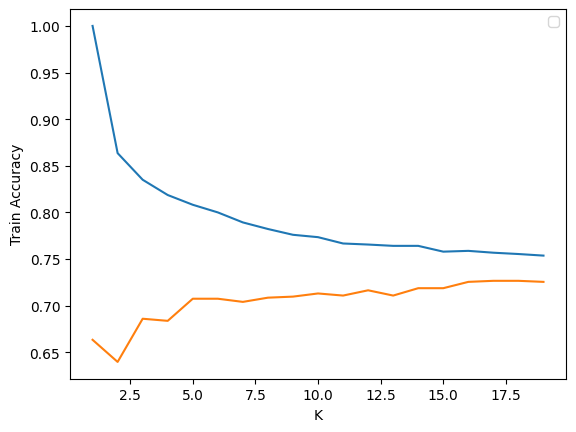

In [ ]:
k_value = []
test_accuracy = []
train_accuracy = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)
  y_pred_train = knn.predict(X_train)

  k_value.append(i)
  accuracy_test = accuracy_score(y_test,y_pred)
  accuracy_train = accuracy_score(y_train,y_pred_train)

  train_accuracy.append(accuracy_train)
  test_accuracy.append(accuracy_test)
df2 = pd.DataFrame({'K':k_value,'Train Accuracy':train_accuracy,'Test Accuracy':test_accuracy})
sns.lineplot(data = df2, x='K',y='Train Accuracy')
sns.lineplot(data = df2, x ='K',y = 'Test Accuracy')
plt.legend()

In [ ]:
df2

,K,Train Accuracy,Test Accuracy
0,1,1.000000,0.663277
1,2,0.863521,0.639548
2,3,0.834982,0.685876
3,4,0.818593,0.683616
4,5,0.808138,0.707345
5,6,0.799943,0.707345
6,7,0.789206,0.703955
7,8,0.782142,0.708475
8,9,0.775925,0.709605
9,10,0.773382,0.712994


In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
k_value = []
val_accuracy = []

for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
  k_fold = KFold(n_splits =5,shuffle = True,random_state = 44)
  cross_val_accuracy = cross_val_score(knn,X,y,cv = k_fold,scoring = 'accuracy')
  k_value.append(i)
  val_accuracy.append(cross_val_accuracy.mean())

In [ ]:
df3 = pd.DataFrame({'K':k_value,'Validation_accuracy':val_accuracy})

In [ ]:
df3

,K,Validation_accuracy
0,1,0.615959
1,2,0.577082
2,3,0.652351
3,4,0.642402
4,5,0.652799
5,6,0.657093
6,7,0.659580
7,8,0.666814
8,9,0.667944
9,10,0.672466


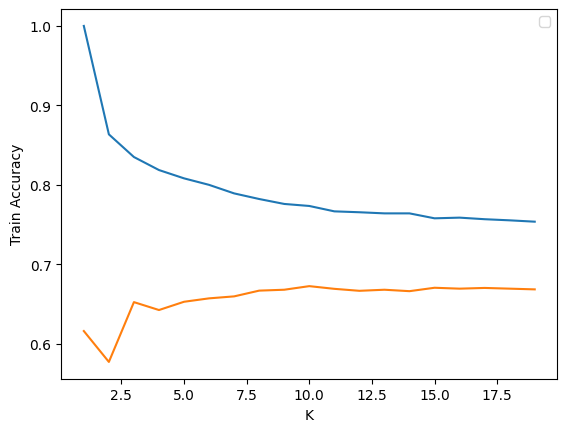

In [ ]:
sns.lineplot(data = df2, x='K',y='Train Accuracy')
sns.lineplot(data = df3, x ='K',y = 'Validation_accuracy')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[203,  21,  80],
       [ 25,  30, 103],
       [  8,  17, 398]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7129943502824859

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.7016534786472676

In [ ]:
recall_score(y_test,y_pred,average='weighted')

0.7107344632768362

In [ ]:
accu = pd.Series({"Accuracy Score":accuracy_score(y_test,y_pred),
              'Precision Score':precision_score(y_test,y_pred,average="weighted"),
              "Recall Score":recall_score(y_test,y_pred,average='weighted'),
             "F1 Score":f1_score(y_test,y_pred,average='weighted')})

In [ ]:
accu

Accuracy Score     0.712994
Precision Score    0.701653
Recall Score       0.712994
F1 Score           0.684606
dtype: float64

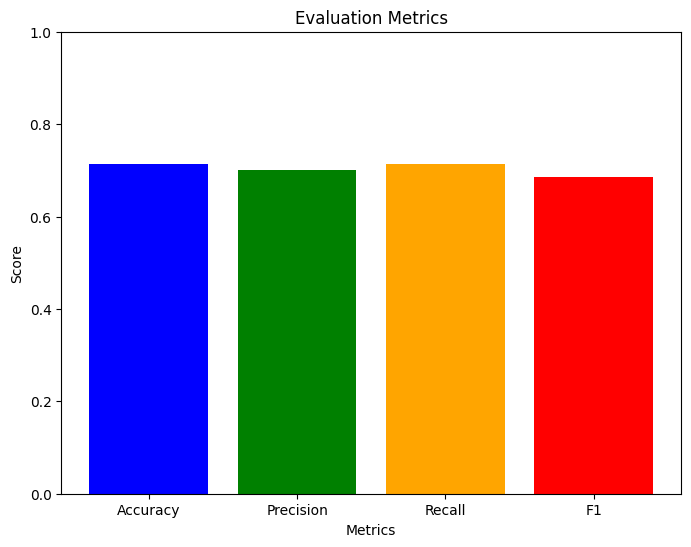

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
scores = [0.712994, 0.701653, 0.712994, 0.684606]
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()


These are the different evaluation metrics that we got when k =15